In [1]:
import pandas as pd
import numpy as np

from collections import OrderedDict, Counter

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("tld-poc-structured-unstructured-sparsity.csv")

In [3]:
# bert-base squad
baseline_f1 = 88.5
baseline_em = 80.8

In [4]:
df = df.drop(index=df.index[df.unstructured_sparsity==65].tolist())

(0.0, 1.0, 0.0, 1.0)

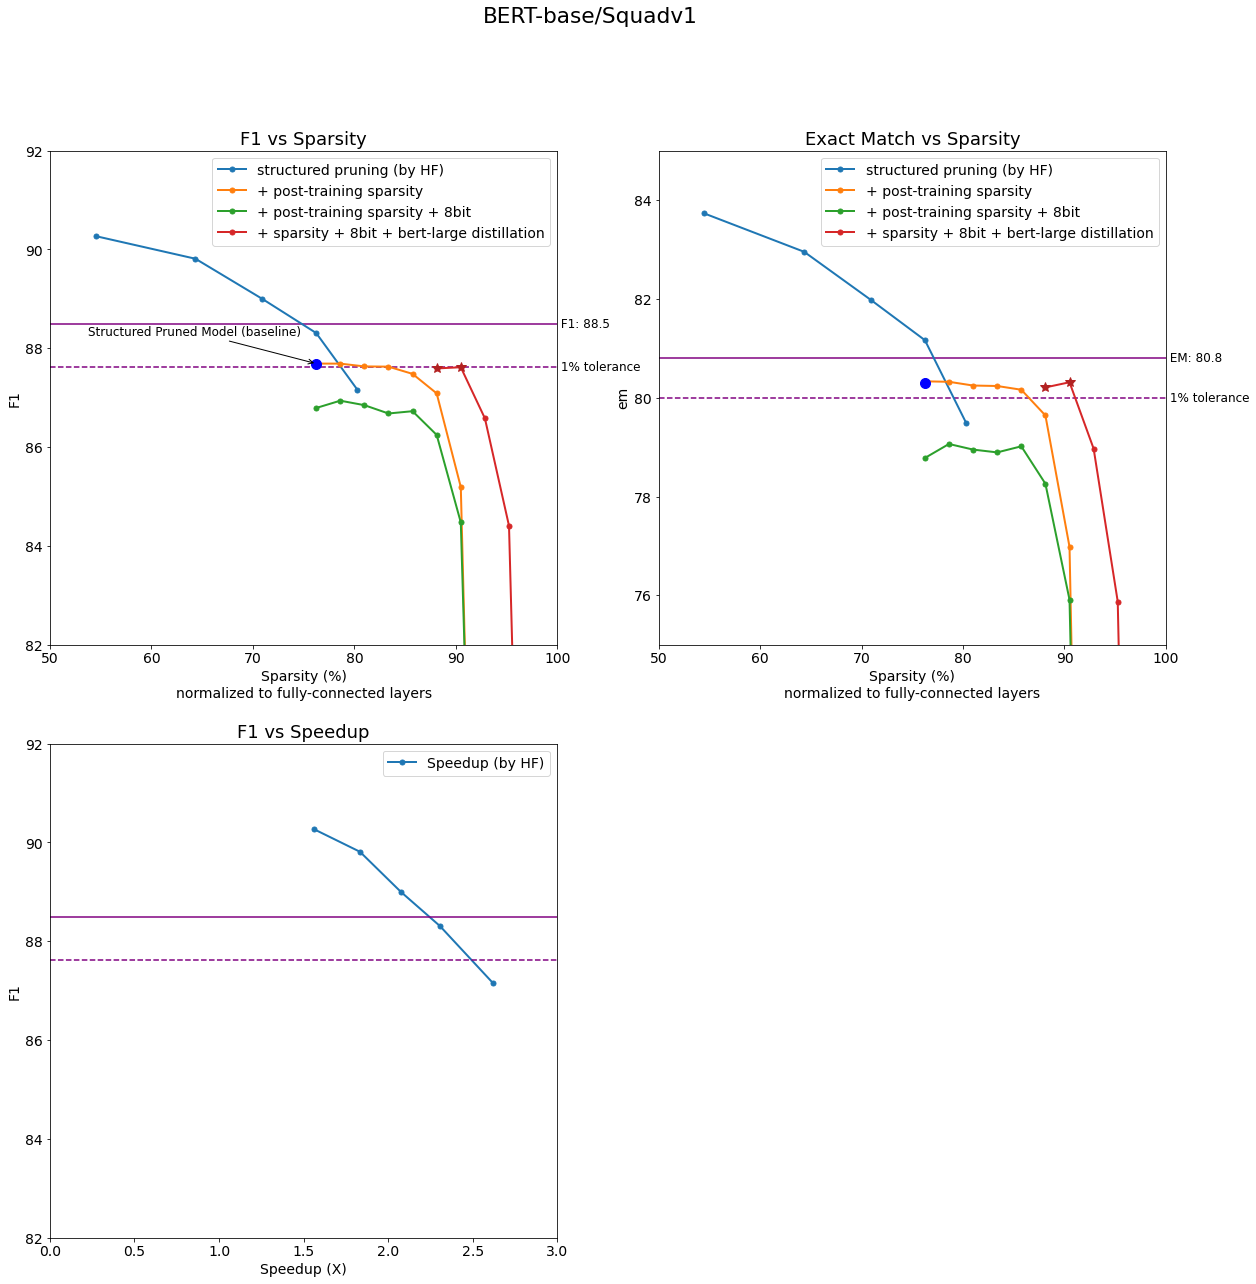

In [5]:
standard_fontsize = 14
small_fontsize = 12
large_fontsize = 18

# fig, ax = plt.subplots(figsize=(10,10))
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,20))

fig.suptitle("BERT-base/Squadv1", fontsize=large_fontsize*1.2)

def plot_line(cat, metric='f1', legend_label=None):
    if legend_label is None:
        legend_label = cat
    plt_df = df.loc[df.category == cat,['linear_sparsity', metric]].sort_values('linear_sparsity')
    plt_df.plot.line(x='linear_sparsity', y=metric, ax=ax, fontsize=standard_fontsize, linewidth=2, marker='.', markersize=10, label=legend_label)

    
# F1 -------------------------------------------------------------------------------------
ax=axes[0,0]
baseline_f1 = 88.5
ax.axhline(y = baseline_f1, color = 'purple', linestyle = '-')
ax.annotate(" F1: 88.5", xy=(100, baseline_f1), va='center', size=small_fontsize)
ax.axhline(y = baseline_f1*.99, color = 'purple', linestyle = 'dashed')
ax.annotate(" 1% tolerance", xy=(100, baseline_f1*.99), va='center', size=small_fontsize)

cat = 'structured pruning'
plot_line(cat, legend_label='structured pruning (by HF)')

cat = 'post-training sparsity'
plot_line(cat, legend_label='+ ' + cat)

cat = 'post-training sparsity + 8bit'
plot_line(cat, legend_label='+ ' + cat)

cat = 'sparsity + 8bit + lt'
plot_line(cat, legend_label='+ sparsity + 8bit + bert-large distillation')

unstructured_50 = tuple(df.loc[(df.category=='sparsity + 8bit + lt') & (df.unstructured_sparsity==50), ['linear_sparsity','f1']].values.flatten().tolist())
ax.plot(unstructured_50[0], unstructured_50[1], '*', markersize=10, color='firebrick')
# ax.annotate('{:.2f}'.format(unstructured_50[1]), xy=unstructured_50, va='center', size=small_fontsize)

unstructured_60 = tuple(df.loc[(df.category=='sparsity + 8bit + lt') & (df.unstructured_sparsity==60), ['linear_sparsity','f1']].values.flatten().tolist())
ax.plot(unstructured_60[0], unstructured_60[1], '*', markersize=10, color='firebrick')
# ax.annotate('{:.2f}'.format(unstructured_50[1]), xy=unstructured_50, va='center', size=small_fontsize)

ax.plot(76.236979, 87.690045, 'bo', markersize=10)
ax.annotate('Structured Pruned Model (baseline)',
            xy=(76.236979, 87.690045), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
            horizontalalignment='right', verticalalignment='bottom', fontsize=small_fontsize)

ax.set_xlim([50, 100])
ax.set_xlabel("Sparsity (%)\nnormalized to fully-connected layers", fontsize = standard_fontsize)

ax.set_ylim([82, 92])
ax.set_ylabel("F1", fontsize = standard_fontsize)

ax.legend(fontsize=standard_fontsize)
ax.set_title("F1 vs Sparsity", fontsize=large_fontsize)

# speedup ----------------------------
ax=axes[1, 0]
plt_df = df.loc[df.category == 'structured pruning', ['speedup', 'f1']].sort_values('speedup')
plt_df.plot.line(x='speedup', y='f1', ax=ax, fontsize=standard_fontsize, linewidth=2, marker='.', markersize=10, label="Speedup (by HF)")

ax.axhline(y = baseline_f1, color = 'purple', linestyle = '-')
ax.annotate(" F1: 88.5", xy=(100, baseline_f1), va='center', size=small_fontsize)
ax.axhline(y = baseline_f1*.99, color = 'purple', linestyle = 'dashed')
ax.annotate(" 1% tolerance", xy=(100, baseline_f1*.99), va='center', size=small_fontsize)

ax.set_xlim([0, 3])
ax.set_xlabel("Speedup (X)", fontsize = standard_fontsize)

ax.set_ylim([82, 92])
ax.set_ylabel("F1", fontsize = standard_fontsize)

ax.legend(fontsize=standard_fontsize)
ax.set_title("F1 vs Speedup", fontsize=large_fontsize)

# em -----------------------
ax=axes[0, 1]

baseline_em = 80.8
ax.axhline(y = baseline_em, color = 'purple', linestyle = '-')
ax.annotate(" EM: {}".format(baseline_em), xy=(100, baseline_em), va='center', size=small_fontsize)
ax.axhline(y = baseline_em*.99, color = 'purple', linestyle = 'dashed')
ax.annotate(" 1% tolerance", xy=(100, baseline_em*.99), va='center', size=small_fontsize)

cat = 'structured pruning'
plot_line(cat, metric='em', legend_label='structured pruning (by HF)')

cat = 'post-training sparsity'
plot_line(cat, metric='em', legend_label='+ ' + cat)

cat = 'post-training sparsity + 8bit'
plot_line(cat, metric='em', legend_label='+ ' + cat)

cat = 'sparsity + 8bit + lt'
plot_line(cat, metric='em', legend_label='+ sparsity + 8bit + bert-large distillation')

unstructured_50 = tuple(df.loc[(df.category=='sparsity + 8bit + lt') & (df.unstructured_sparsity==50), ['linear_sparsity','em']].values.flatten().tolist())
ax.plot(unstructured_50[0], unstructured_50[1], '*', markersize=10, color='firebrick')
# ax.annotate('{:.2f}'.format(unstructured_50[1]), xy=unstructured_50, va='center', size=small_fontsize)

unstructured_60 = tuple(df.loc[(df.category=='sparsity + 8bit + lt') & (df.unstructured_sparsity==60), ['linear_sparsity','em']].values.flatten().tolist())
ax.plot(unstructured_60[0], unstructured_60[1], '*', markersize=10, color='firebrick')
# ax.annotate('{:.2f}'.format(unstructured_50[1]), xy=unstructured_50, va='center', size=small_fontsize)

ax.plot(76.236979, 80.3, 'bo', markersize=10)
ax.annotate('Structured Pruned Model (baseline)',
            xy=(76.236979, 87.690045), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
            horizontalalignment='right', verticalalignment='bottom', fontsize=small_fontsize)

ax.set_xlim([50, 100])
ax.set_xlabel("Sparsity (%)\nnormalized to fully-connected layers", fontsize = standard_fontsize)

ax.set_ylim([75, 85])
ax.set_ylabel("em", fontsize = standard_fontsize)

ax.legend(fontsize=standard_fontsize)
ax.set_title("Exact Match vs Sparsity", fontsize=large_fontsize)

# Speedup---------------

axes[1,1].axis('off')

In [6]:
fig.savefig("tld-poc-plot.png")

In [7]:
# df.loc[(df.category=='sparsity + 8bit + lt'),]

In [8]:
# df.loc[(df.category=='structured pruning'),]